# Suport Vector Machine 실습

1. 기본 SVM
2. SVM with Soft Margin
3. SVM with Kernel Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.svm import SVC

## 1. 기본 SVM

In [ ]:
# generate sample data
x_data, y_data = make_blobs(n_samples=50, centers=2, random_state=16)

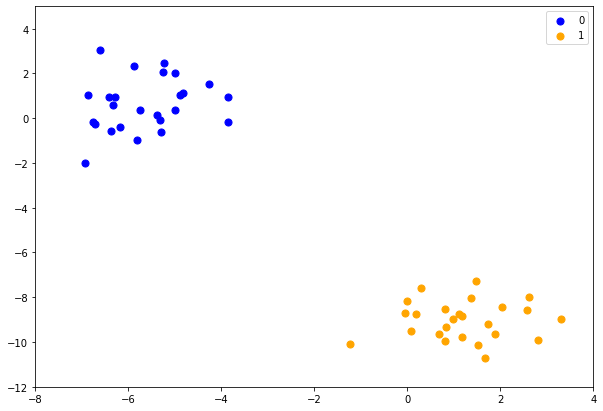

In [ ]:
# visualize data
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-8,4])
plt.ylim([-12,5])

plt.legend()
plt.show()

In [ ]:
# train model
model = SVC(kernel='linear')
model.fit(x_data, y_data)

SVC(kernel='linear')

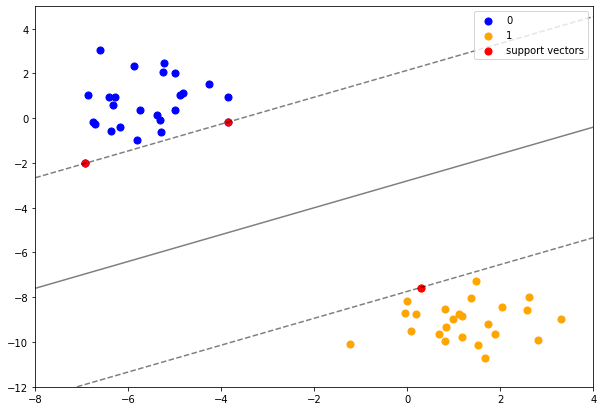

In [ ]:
# visualize trained model (hyperplane, support vector)
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-8,4])
plt.ylim([-12,5])

plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], c='red', s=50, label='support vectors')

xx = np.linspace(-8,4,30)
yy = np.linspace(-12,5,30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.show()


In [ ]:
# generate test data
np.random.seed(5)
test_data = np.random.rand(10,2)*4+(-3,-5)

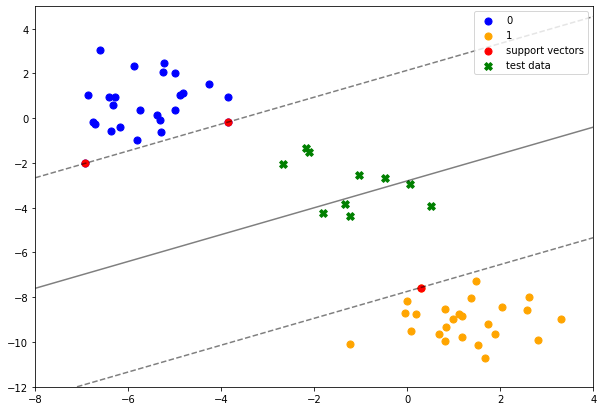

In [ ]:
# visualize test data
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-8,4])
plt.ylim([-12,5])

plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], c='red', s=50, label='support vectors')

xx = np.linspace(-8,4,30)
yy = np.linspace(-12,5,30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

plt.scatter(test_data[:,0], test_data[:,1], c='green', s=60, marker='X', label='test data')

plt.legend()
plt.show()


In [ ]:
# predict test data with trained model
test_y = model.predict(test_data)

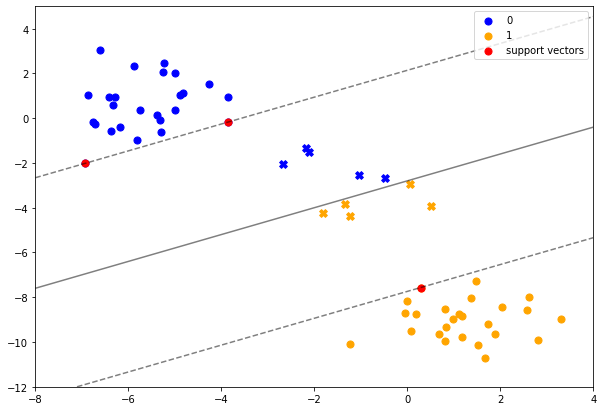

In [ ]:
# visualize prediction results
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-8,4])
plt.ylim([-12,5])

plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], c='red', s=50, label='support vectors')

xx = np.linspace(-8,4,30)
yy = np.linspace(-12,5,30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

plt.scatter(test_data[test_y==0,0],test_data[test_y==0,1], c='blue', marker='X', s=60)
plt.scatter(test_data[test_y==1,0],test_data[test_y==1,1], c='orange', marker='X', s=60)

plt.legend()
plt.show()

## 2. SVM with Soft Margin

In [ ]:
x_data = np.vstack([x_data, [[0,-6]]])
y_data = np.hstack([y_data, 0])

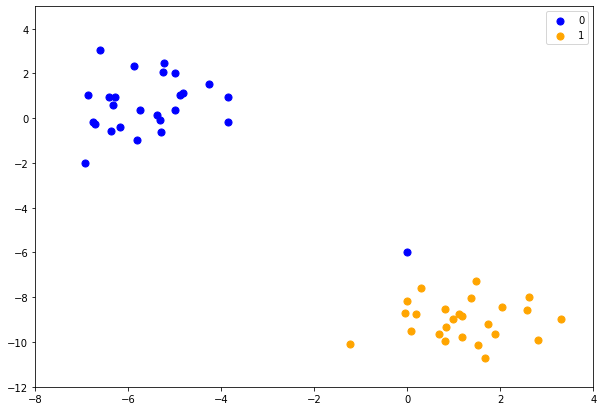

In [ ]:
# visualize data
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-8,4])
plt.ylim([-12,5])

plt.legend()
plt.show()

In [ ]:
# train model
model = SVC(kernel='linear')
model.fit(x_data, y_data)

SVC(kernel='linear')

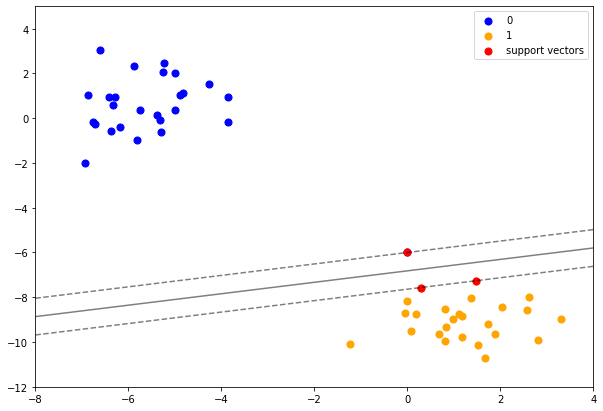

In [ ]:
# visualize trained model (hyperplane, support vector)
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-8,4])
plt.ylim([-12,5])

plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], c='red', s=50, label='support vectors')

xx = np.linspace(-8,4,30)
yy = np.linspace(-12,5,30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.show()


In [ ]:
# re-train model with regularization parameter (C)
model = SVC(kernel='linear', C=0.1)
model.fit(x_data, y_data)

SVC(C=0.1, kernel='linear')

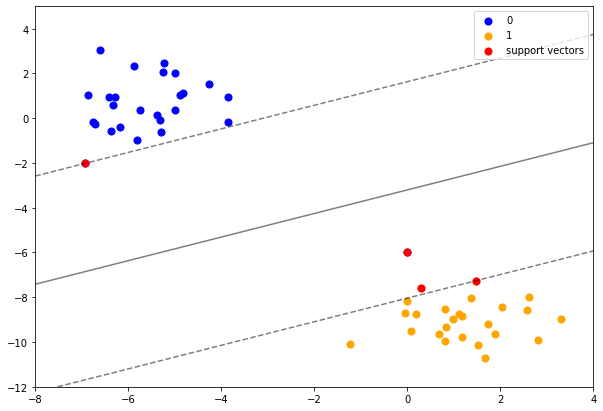

In [ ]:
# visualize re-trained model
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-8,4])
plt.ylim([-12,5])

plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], c='red', s=50, label='support vectors')

xx = np.linspace(-8,4,30)
yy = np.linspace(-12,5,30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.show()


## 3. SVM with Kernel Method

In [ ]:
# generate sample data
x_data, y_data = make_moons(n_samples=60, noise=0.2, random_state=10)

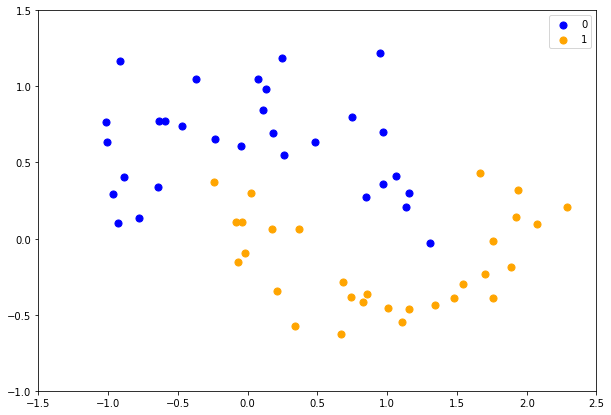

In [ ]:
# visualize data
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-1.5,2.5])
plt.ylim([-1.0,1.5])

plt.legend()
plt.show()

In [ ]:
# train model with linear method
model = SVC(kernel='linear')
model.fit(x_data, y_data)

SVC(kernel='linear')

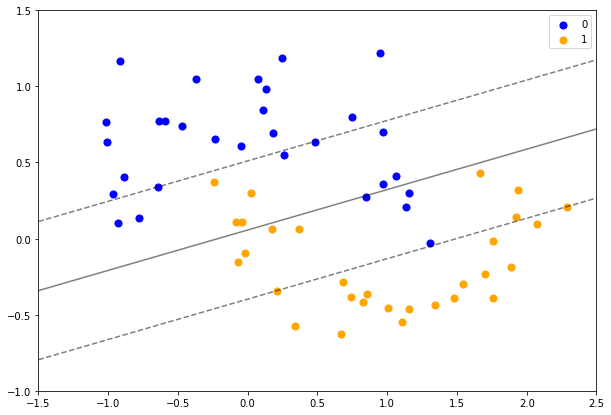

In [ ]:
# visualize trained model
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-1.5,2.5])
plt.ylim([-1.0,1.5])

xx = np.linspace(-1.5,2.5,30)
yy = np.linspace(-1.0,1.5,30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.show()


In [ ]:
# re-train model with kernel method
model = SVC(kernel='rbf')
model.fit(x_data, y_data)

SVC()

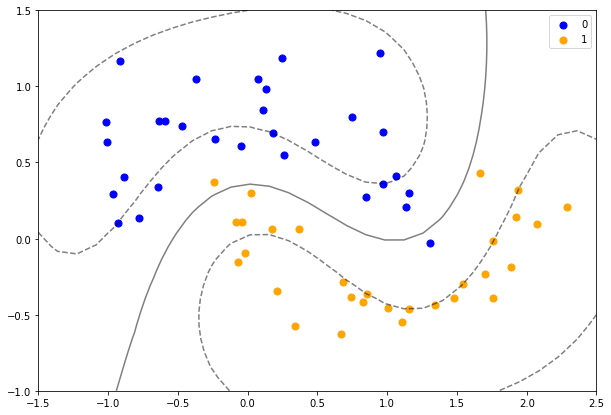

In [ ]:
# visualize trained model (hyperplane)
plt.figure(figsize=(10,7))
plt.scatter(x_data[y_data==0,0],x_data[y_data==0,1], c='blue', s=50, label='0')
plt.scatter(x_data[y_data==1,0],x_data[y_data==1,1], c='orange', s=50, label='1')
plt.xlim([-1.5,2.5])
plt.ylim([-1.0,1.5])

xx = np.linspace(-1.5,2.5,30)
yy = np.linspace(-1.0,1.5,30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.show()
